In [1]:
import pandas as pd
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
tfl_key = <API KEY HERE>
tfl_url  = "https://api.tfl.gov.uk/" # base URL
tflpayload = {'key': tfl_key} # Dictionary to hold request parameters

In [177]:
# startloc is string of latlong coordinates of postcode sector centroid
# endloc is string of latlong cordinates of hospital

requrl = "/Journey/JourneyResults/" + startloc + "/to/" + endloc
getreq = requests.get(tfl_url + requrl) # Do the request
jp = getreq.json()

# json path to travel duration:
jp['journeys'][0]['duration']

# json path to travel fare:
jp['journeys'][0]['fare']['totalCost']

69

In [330]:
def travelDuration(tfl_key, startloc, endloc, df, iRange):
    requrl = "/Journey/JourneyResults/" + startloc + "/to/" + endloc
    tfl_url  = "https://api.tfl.gov.uk/"
    tflpayload = {'key': tfl_key}
    
    for i in iRange:
        getreq = requests.get(tfl_url + requrl) # Do the request
        jp = getreq.json()
        try:
            df['travelDuration'][i] = jp['journeys'][0]['duration']
        except:
            pass

In [3]:
staffInPost = pd.read_csv("CUSP London Data Dive 2019/data/Workforce Data/LAS_Staff_in_Post_070319.csv")

In [4]:
staffInPost.columns

Index(['IDnumber', 'Board', 'Division', 'Directorate', 'Locality', 'Service',
       'Department', 'Location', 'Gender', 'AgeBand', 'PostcodeSector',
       'PositionTitle', 'EmployeeCategory', 'AssignmentCategory', 'FTE',
       'ContractHours', 'Frequency', 'LengthOfService(Years)',
       'LengthOfService(Months)', 'nhsEntryDate', 'LatestStartDate',
       'StartDateInGrade', 'TimeInGrade(Years)',
       'AssignmentEffectiveStartDate', 'OriginalHireDate',
       'StartDateInPosition'],
      dtype='object')

## Summary Statistics

In [5]:
print("Number of Males: %i" %len(staffInPost[staffInPost.Gender == 'Male']))
print("Number of Females: %i" %len(staffInPost[staffInPost.Gender == 'Female']))
print("Total Number of Employees: %i" %len(staffInPost))

Number of Males: 3040
Number of Females: 2681
Total Number of Employees: 5721


In [6]:
staffInPost["LengthOfService(YearsFloat)"] = staffInPost["LengthOfService(Years)"] + staffInPost["LengthOfService(Months)"]/12

In [327]:
staffInPost.columns

Index(['IDnumber', 'Board', 'Division', 'Directorate', 'Locality', 'Service',
       'Department', 'Location', 'Gender', 'AgeBand', 'PostcodeSector',
       'PositionTitle', 'EmployeeCategory', 'AssignmentCategory', 'FTE',
       'ContractHours', 'Frequency', 'LengthOfService(Years)',
       'LengthOfService(Months)', 'nhsEntryDate', 'LatestStartDate',
       'StartDateInGrade', 'TimeInGrade(Years)',
       'AssignmentEffectiveStartDate', 'OriginalHireDate',
       'StartDateInPosition', 'LengthOfService(YearsFloat)', 'StartMonth'],
      dtype='object')

In [10]:
for ageBand in sorted(staffInPost["AgeBand"].unique()):
    print("Percentage of employees " + ageBand + " : %f" %(len(staffInPost[staffInPost["AgeBand"] == ageBand])/len(staffInPost)))

Percentage of employees 21-25 : 0.148401
Percentage of employees 26-30 : 0.177591
Percentage of employees 31-35 : 0.129872
Percentage of employees 36-40 : 0.113092
Percentage of employees 41-45 : 0.109771
Percentage of employees 46-50 : 0.127425
Percentage of employees 51-55 : 0.100332
Percentage of employees 56-60 : 0.058381
Percentage of employees 61-65 : 0.023248
Percentage of employees 66-70 : 0.003845
Percentage of employees <=20 Years : 0.006817
Percentage of employees >=71 Years : 0.001224


Text(0.5,1,'Histogram')

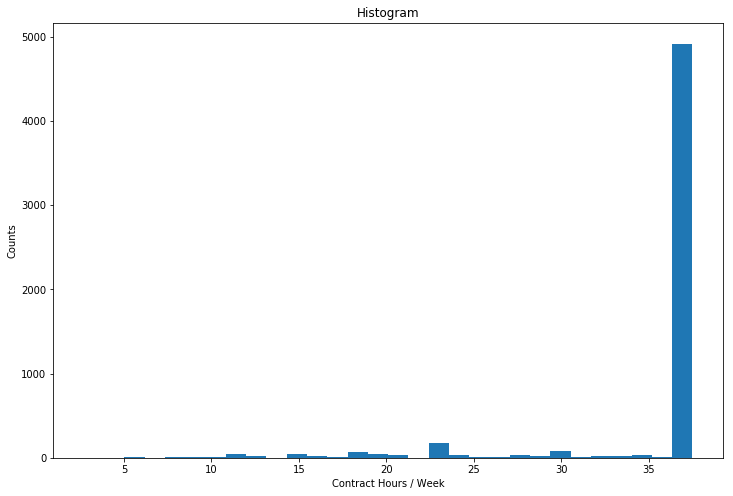

In [11]:
plt.figure(figsize=(12,8))
plt.hist(staffInPost['ContractHours'], bins=30)
plt.xlabel("Contract Hours / Week")
plt.ylabel("Counts")
plt.title("Histogram")

### Investigating start months as a factor for leaving:

In [12]:
staffInPost['LatestStartDate'] = pd.to_datetime(staffInPost['LatestStartDate'], infer_datetime_format=True)

In [13]:
staffInPost['StartMonth'] = staffInPost['LatestStartDate'].dt.month

Text(0.5,1,'More than 15 Years')

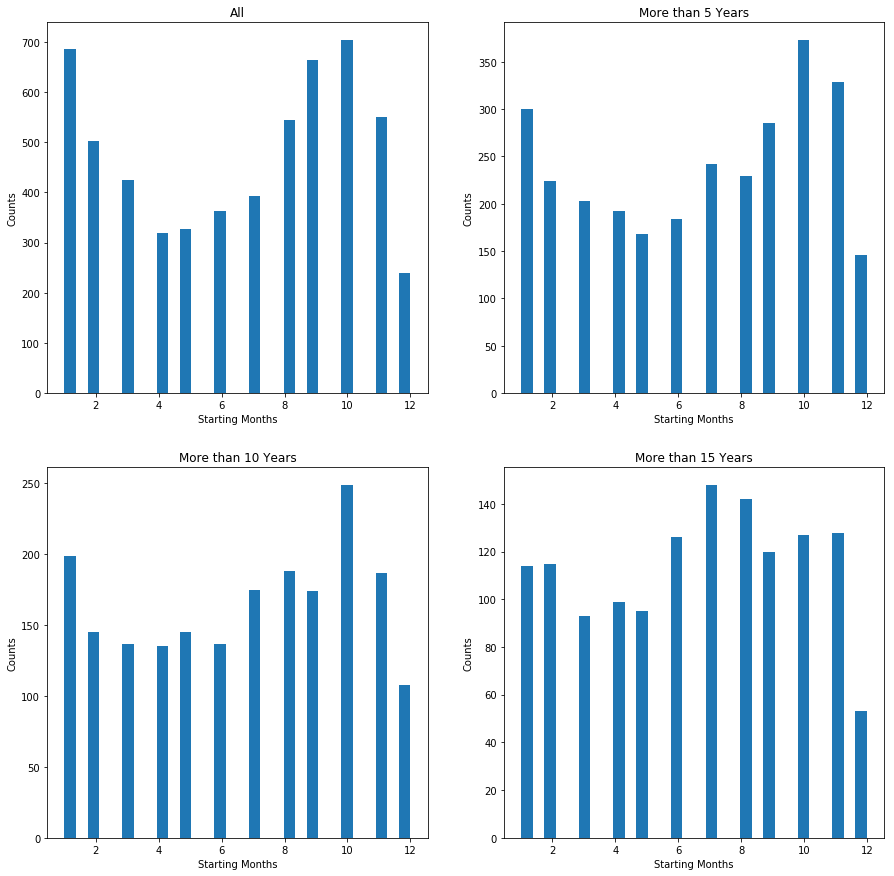

In [14]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(221)
plt.hist(staffInPost['StartMonth'], bins=30)
plt.xlabel("Starting Months")
plt.ylabel("Counts")
plt.title("All")

fig.add_subplot(222)
moreThan5 = staffInPost[staffInPost['LengthOfService(YearsFloat)'] > 5]
plt.hist(moreThan5['StartMonth'], bins=30)
plt.xlabel("Starting Months")
plt.ylabel("Counts")
plt.title("More than 5 Years")

fig.add_subplot(223)
moreThan10 = staffInPost[staffInPost['LengthOfService(YearsFloat)'] > 10]
plt.hist(moreThan10['StartMonth'], bins=30)
plt.xlabel("Starting Months")
plt.ylabel("Counts")
plt.title("More than 10 Years")

fig.add_subplot(224)
moreThan15 = staffInPost[staffInPost['LengthOfService(YearsFloat)'] > 15]
plt.hist(moreThan15['StartMonth'], bins=30)
plt.xlabel("Starting Months")
plt.ylabel("Counts")
plt.title("More than 15 Years")

In [15]:
for category in staffInPost['EmployeeCategory'].unique():
    print(category + ": %i" %len(staffInPost[staffInPost['EmployeeCategory'] == category]))

Full Time: 4911
Part Time: 810


C:\Users\rachelsim\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\rachelsim\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


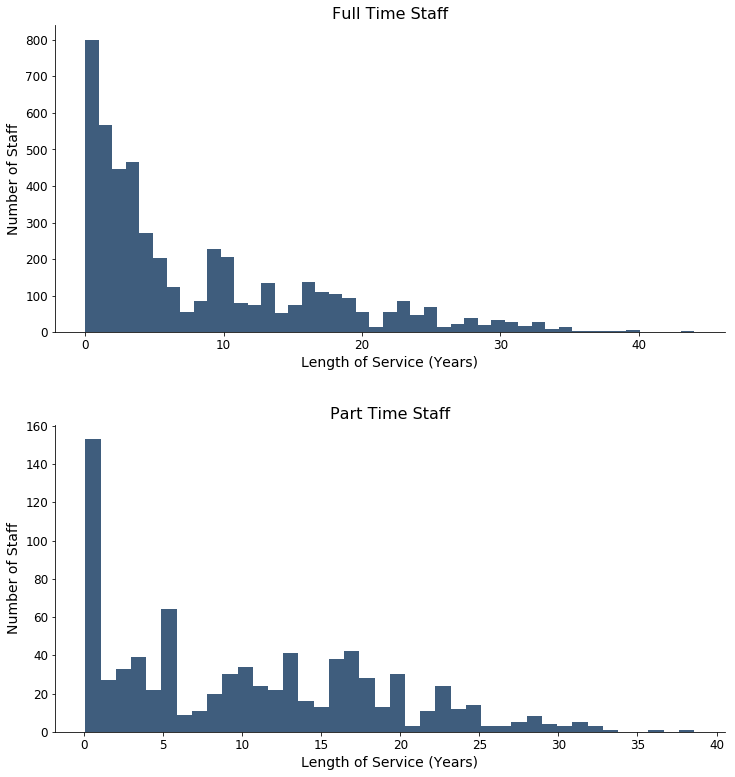

In [479]:
fig = plt.figure(figsize=(12,13))

fig.add_subplot(211)
ax = plt.subplot(211)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fullTime = staffInPost[staffInPost['EmployeeCategory'] == 'Full Time']
ax.hist(fullTime['LengthOfService(YearsFloat)'], bins=45, color="#3F5D7D")
ax.set_xlabel("Length of Service (Years)", fontsize=14)
ax.set_ylabel("Number of Staff", fontsize=14)
ax.set_title("Full Time Staff", fontsize=16)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

fig.add_subplot(212)
ax = plt.subplot(212)
plt.subplots_adjust(hspace=0.3)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
partTime = staffInPost[staffInPost['EmployeeCategory'] == 'Part Time']
ax.hist(partTime['LengthOfService(YearsFloat)'], bins=40, color="#3F5D7D")
ax.set_xlabel("Length of Service (Years)", fontsize=14)
ax.set_ylabel("Number of Staff", fontsize=14)
ax.set_title("Part Time Staff", fontsize=16)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

In [17]:
serviceLocations = pd.read_csv("CUSP London Data Dive 2019/data/Workforce Data/workplace location table.csv")
serviceLocations.columns

Index(['location', 'locationaddress', 'postcode', 'esrLocationFull', 'manual'], dtype='object')

In [18]:
staffWorkLocations = pd.merge(left=staffInPost, right=serviceLocations, left_on='Location', right_on='esrLocationFull')
staffWorkLocations.columns

Index(['IDnumber', 'Board', 'Division', 'Directorate', 'Locality', 'Service',
       'Department', 'Location', 'Gender', 'AgeBand', 'PostcodeSector',
       'PositionTitle', 'EmployeeCategory', 'AssignmentCategory', 'FTE',
       'ContractHours', 'Frequency', 'LengthOfService(Years)',
       'LengthOfService(Months)', 'nhsEntryDate', 'LatestStartDate',
       'StartDateInGrade', 'TimeInGrade(Years)',
       'AssignmentEffectiveStartDate', 'OriginalHireDate',
       'StartDateInPosition', 'LengthOfService(YearsFloat)', 'StartMonth',
       'location', 'locationaddress', 'postcode', 'esrLocationFull', 'manual'],
      dtype='object')

In [19]:
leavers = pd.read_csv("CUSP London Data Dive 2019/data/Workforce Data/LAS_Leavers_070319.csv")
leavers.columns

Index(['Employee Number', 'Assignment Number', 'Org L5', 'Org L6', 'Org L7',
       'Org L8', 'Staff Group', 'Position Title', 'Job Role',
       'Employee Latest Start Date', 'Notified Date', 'Termination Date',
       'Leaving year', 'Destination On Leaving', 'Leaving Reason', 'FTE',
       'FT/PT', 'Initial Assignment Start Date', 'Pay Grade',
       'Length of Service (Years)', 'Length of Service (Months)', 'LOS',
       'LOS (Years)', 'LOS band', 'Age Band', 'Ethnic Origin', 'Bme group',
       'Gender', 'Nationality', 'Assignment Category'],
      dtype='object')

In [23]:
# reading in csv file Liam created that contains coords of postcode sector centroids:

pcSectorCentroids = pd.read_csv('co-ords4.csv')
pcSectorCentroids.rename(columns={'name': 'PostcodeSector'}, inplace=True)
pcSectorCentroids.drop(labels='Unnamed: 0', axis=1, inplace=True)
pcSectorCentroids.head()

,PostcodeSector,centroids_str
0,E11 2,"51.57538361539157,0.03122833245535627"
1,DA9 9,"51.44649170148372,0.2773212373297947"
2,TN16 3,"51.31574566211062,0.03366749030207872"
3,DA16 2,"51.4588613782438,0.09859581873185735"
4,BR3 4,"51.40315037550847,-0.04587958580064797"


In [24]:
staffLocations = staffWorkLocations.merge(pcSectorCentroids, how='outer', on='PostcodeSector')

In [25]:
len(staffLocations[staffLocations['centroids_str'].isnull()]['PostcodeSector'].unique())

14

In [27]:
staffLocations[staffLocations['centroids_str'].isnull()]['PostcodeSector'].unique()

array(['FALS E', 'NW9 4', 'SW11 7', 'W6 2', 'DA11 O', 'BT31 9', 'W17 2',
       'BT20 4', 'SW11 8', 'TN24 2', 'CM6 4', 'N39T 6', 'WD18 O',
       'KT14 3'], dtype=object)

In [28]:
# drop FALSE, W17 2, N39T 6, BT postcodes and manually insert other coordinates:

staffLocations[staffLocations['PostcodeSector'] == 'SW11 7']['centroids_str'] = '51.49177,-0.1370286'
staffLocations[staffLocations['PostcodeSector'] == 'SW11 8']['centroids_str'] = '51.5047865,-0.1541728'
staffLocations[staffLocations['PostcodeSector'] == 'KT14 3']['centroids_str'] = '51.3418376,-0.4998108'
staffLocations[staffLocations['PostcodeSector'] == 'CM6 4']['centroids_str'] = '51.8593837,0.1529848'
staffLocations[staffLocations['PostcodeSector'] == 'WD18 O']['centroids_str'] = '51.6426322,-0.4480033'
staffLocations[staffLocations['PostcodeSector'] == 'W6 2']['centroids_str'] = '51.4976485,-0.2581849'
staffLocations[staffLocations['PostcodeSector'] == 'NW9 4']['centroids_str'] = '51.5835152,-0.2870196'
staffLocations[staffLocations['PostcodeSector'] == 'TN24 2']['centroids_str'] = '51.148175,0.8501124'
staffLocations[staffLocations['PostcodeSector'] == 'DA11 O']['centroids_str'] = '51.4504867,0.3502812'

staffLocations = staffLocations[staffLocations['PostcodeSector'] != 'FALS E']
staffLocations = staffLocations[staffLocations['PostcodeSector'] != 'W17 2']
staffLocations = staffLocations[staffLocations['PostcodeSector'] != 'N39T 6']
staffLocations = staffLocations[staffLocations['PostcodeSector'] != 'BT31 9']
staffLocations = staffLocations[staffLocations['PostcodeSector'] != 'BT20 4']

C:\Users\rachelsim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rachelsim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rachelsim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [29]:
# reading in csv file Liam created that contains coords of service locations:

stationCoords = pd.read_csv('station_pc_latlong.csv')
stationCoords.rename(columns={'Lat,long': 'WorkLatLon', 'Postcode': 'postcode'}, inplace=True)
labels=['Latitude', 'Longitude']
stationCoords.drop(labels=labels, axis=1, inplace=True)
stationCoords.head()

,postcode,WorkLatLon
0,DA7 6BZ,"51.460793,0.15380635"
1,EN5 1TE,"51.647271,-0.18591394"
2,SW11 1HW,"51.460613,-0.16778757"
3,BR3 4LR,"51.408006,-0.034009912"
4,WC1N 1HP,"51.524889,-0.12663222"


In [30]:
stationCoords['postcode'] = stationCoords['postcode'].astype(str)
staffLocations['postcode'] = staffLocations['postcode'].astype(str)

In [31]:
stationCoords.drop_duplicates('postcode', keep='first', inplace=True)

In [32]:
staffFinal = staffLocations.merge(right=stationCoords, how='inner', on='postcode')
len(staffFinal)

5712

In [33]:
staffFinal.rename(columns={'location': 'WorkLocation', 'locationaddress': 'WorkAddress', 'postcode': 'WorkPostcode',
                              'esrLocationFull': 'WorkLocationFull', 'centroids_str': 'ResLatLon'}, inplace=True)

In [34]:
staffFinal['travelDuration'] = ''

In [102]:
# extracting duration from api
for i in range(0, 5712):
    startloc = staffFinal['ResLatLon'][i]
    endloc = staffFinal['WorkLatLon'][i]
    requrl = "https://api.tfl.gov.uk/Journey/JourneyResults/" + str(startloc) + "/to/" + str(endloc)
    tflpayload = {'key': tfl_key}
    
    getreq = requests.get(requrl)
    jp = getreq.json()
    try:
        staffFinal['travelDuration'][i] = jp['journeys'][0]['duration']
    except:
        staffFinal['travelDuration'][i] = np.nan

C:\Users\rachelsim\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rachelsim\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [109]:
staffFinal.tail()

,IDnumber,Board,Division,Directorate,Locality,Service,Department,Location,Gender,AgeBand,...,LengthOfService(YearsFloat),StartMonth,WorkLocation,WorkAddress,WorkPostcode,WorkLocationFull,manual,ResLatLon,WorkLatLon,travelDuration
5707,10549800,308 Operations L3,308 OPS Operations Directorate L4,308 SEC Sector Operations L5,308 SEC North West Sector L6,308 SEC Fulham Group Station L7,308 SEC Chiswick Ambulance Station,308 07 C2 Chiswick,Male,56-60,...,18.750000,5,Chiswick,Chiswick Ambulance Station 368 Goldhawk Road L...,W6 0XF,308 07 C2 Chiswick,0,"50.77709013849093,0.3056773437201214","51.497169,-0.24430627",NaN
5708,21201197,308 Operations L3,308 OPS Operations Directorate L4,308 SEC Sector Operations L5,308 SEC North West Sector L6,308 SEC Fulham Group Station L7,308 SEC Chiswick Ambulance Station,308 07 C2 Chiswick,Male,36-40,...,10.083333,1,Chiswick,Chiswick Ambulance Station 368 Goldhawk Road L...,W6 0XF,308 07 C2 Chiswick,0,"51.71780025852933,-0.3684661818247322","51.497169,-0.24430627",111
5709,10549695,308 Operations L3,308 OPS Operations Directorate L4,308 SEC Sector Operations L5,308 SEC North West Sector L6,308 SEC Fulham Group Station L7,308 SEC Chiswick Ambulance Station,308 07 C2 Chiswick,Male,56-60,...,18.083333,1,Chiswick,Chiswick Ambulance Station 368 Goldhawk Road L...,W6 0XF,308 07 C2 Chiswick,0,"51.48621040924726,-0.4736292199737025","51.497169,-0.24430627",64
5710,10550341,308 Operations L3,308 OPS Operations Directorate L4,308 CEN Central Operations L5,308 CEN Resilience L6,308 CEN HART & CBRN L7,308 CEN CBRN Unit,308 89 Richmond House,Male,66-70,...,38.083333,1,Richmond House,Richmond House 79 Whitehall LONDON SW1A 2NS,SW1A 2NS,308 89 Richmond House,0,"51.54710678646012,0.1383245960252592","51.502486,-0.12531779",71
5711,10550382,308 Corporate L3,308 FIN Finance L4,308 FIN Finance L5,308 FIN Finance L6,308 FIN Finance L7,308 FIN Purchasing,308 75 Loman St,Male,61-65,...,16.666667,7,Loman St,LAS HQ Annexe - Loman Street 46 Loman Street L...,SE1 0EH,308 75 Loman St,0,"51.2566615634815,-0.1854481151530184","51.502938,-0.099781186",85


In [108]:
staffFinal.to_csv('staffFinal_v3.csv', index=False)

In [118]:
staffFinal['ResLat'] = staffFinal['ResLatLon'].str.split(pat=',', expand=True)[0]
staffFinal['ResLon'] = staffFinal['ResLatLon'].str.split(pat=',', expand=True)[1]
staffFinal.head()

,IDnumber,Board,Division,Directorate,Locality,Service,Department,Location,Gender,AgeBand,...,WorkLocation,WorkAddress,WorkPostcode,WorkLocationFull,manual,ResLatLon,WorkLatLon,travelDuration,ResLat,ResLon
0,25408862,308 Operations L3,308 OPS Operations Directorate L4,308 SEC Sector Operations L5,308 SEC North Central Sector L6,308 SEC Edmonton Group Station L7,308 SEC Edmonton Ambulance Station,308 28 H3 Edmonton,Male,26-30,...,Edmonton,Edmonton Ambulance Station Windmill Road Londo...,N18 1NJ,308 28 H3 Edmonton,0,"51.65638844462026,-0.02822827882205483","51.619499,-0.081047958",65,51.65638844462026,-0.02822827882205483
1,10547942,308 Operations L3,308 OPS Operations Directorate L4,308 SEC Sector Operations L5,308 SEC North Central Sector L6,308 SEC Edmonton Group Station L7,308 SEC Edmonton Ambulance Station,308 28 H3 Edmonton,Male,51-55,...,Edmonton,Edmonton Ambulance Station Windmill Road Londo...,N18 1NJ,308 28 H3 Edmonton,0,"51.69319400654601,0.3566157610526208","51.619499,-0.081047958",154,51.69319400654601,0.3566157610526208
2,24119591,308 Operations L3,308 OPS Operations Directorate L4,308 SEC Sector Operations L5,308 SEC North Central Sector L6,308 SEC Edmonton Group Station L7,308 SEC Edmonton Ambulance Station,308 28 H3 Edmonton,Male,26-30,...,Edmonton,Edmonton Ambulance Station Windmill Road Londo...,N18 1NJ,308 28 H3 Edmonton,0,"51.6830515470273,0.03322743300823042","51.619499,-0.081047958",119,51.6830515470273,0.03322743300823042
3,10548486,308 Operations L3,308 OPS Operations Directorate L4,308 SEC Sector Operations L5,308 SEC North Central Sector L6,308 SEC Edmonton Group Station L7,308 SEC Edmonton Management & Admin,308 28 H3 Edmonton,Female,46-50,...,Edmonton,Edmonton Ambulance Station Windmill Road Londo...,N18 1NJ,308 28 H3 Edmonton,0,"51.6830515470273,0.03322743300823042","51.619499,-0.081047958",119,51.6830515470273,0.03322743300823042
4,23892265,308 Operations L3,308 OPS Operations Directorate L4,308 SEC Sector Operations L5,308 SEC North Central Sector L6,308 SEC Edmonton Group Station L7,308 SEC Edmonton Ambulance Station,308 28 H3 Edmonton,Male,26-30,...,Edmonton,Edmonton Ambulance Station Windmill Road Londo...,N18 1NJ,308 28 H3 Edmonton,0,"51.52112562830071,-0.06372390048071021","51.619499,-0.081047958",61,51.52112562830071,-0.06372390048071021


In [119]:
staffFinal['WorkLat'] = staffFinal['WorkLatLon'].str.split(pat=',', expand=True)[0]
staffFinal['WorkLon'] = staffFinal['WorkLatLon'].str.split(pat=',', expand=True)[1]
staffFinal.head()

,IDnumber,Board,Division,Directorate,Locality,Service,Department,Location,Gender,AgeBand,...,WorkPostcode,WorkLocationFull,manual,ResLatLon,WorkLatLon,travelDuration,ResLat,ResLon,WorkLat,WorkLon
0,25408862,308 Operations L3,308 OPS Operations Directorate L4,308 SEC Sector Operations L5,308 SEC North Central Sector L6,308 SEC Edmonton Group Station L7,308 SEC Edmonton Ambulance Station,308 28 H3 Edmonton,Male,26-30,...,N18 1NJ,308 28 H3 Edmonton,0,"51.65638844462026,-0.02822827882205483","51.619499,-0.081047958",65,51.65638844462026,-0.02822827882205483,51.619499,-0.081047958
1,10547942,308 Operations L3,308 OPS Operations Directorate L4,308 SEC Sector Operations L5,308 SEC North Central Sector L6,308 SEC Edmonton Group Station L7,308 SEC Edmonton Ambulance Station,308 28 H3 Edmonton,Male,51-55,...,N18 1NJ,308 28 H3 Edmonton,0,"51.69319400654601,0.3566157610526208","51.619499,-0.081047958",154,51.69319400654601,0.3566157610526208,51.619499,-0.081047958
2,24119591,308 Operations L3,308 OPS Operations Directorate L4,308 SEC Sector Operations L5,308 SEC North Central Sector L6,308 SEC Edmonton Group Station L7,308 SEC Edmonton Ambulance Station,308 28 H3 Edmonton,Male,26-30,...,N18 1NJ,308 28 H3 Edmonton,0,"51.6830515470273,0.03322743300823042","51.619499,-0.081047958",119,51.6830515470273,0.03322743300823042,51.619499,-0.081047958
3,10548486,308 Operations L3,308 OPS Operations Directorate L4,308 SEC Sector Operations L5,308 SEC North Central Sector L6,308 SEC Edmonton Group Station L7,308 SEC Edmonton Management & Admin,308 28 H3 Edmonton,Female,46-50,...,N18 1NJ,308 28 H3 Edmonton,0,"51.6830515470273,0.03322743300823042","51.619499,-0.081047958",119,51.6830515470273,0.03322743300823042,51.619499,-0.081047958
4,23892265,308 Operations L3,308 OPS Operations Directorate L4,308 SEC Sector Operations L5,308 SEC North Central Sector L6,308 SEC Edmonton Group Station L7,308 SEC Edmonton Ambulance Station,308 28 H3 Edmonton,Male,26-30,...,N18 1NJ,308 28 H3 Edmonton,0,"51.52112562830071,-0.06372390048071021","51.619499,-0.081047958",61,51.52112562830071,-0.06372390048071021,51.619499,-0.081047958


In [120]:
staffFinal.to_csv('staffFinal_v4.csv', index=False)

In [133]:
staffFinal.travelDuration = staffFinal.travelDuration.astype(float)

In [257]:
staffFinal.travelDuration.mean()

63.113862390907244

In [161]:
len(staffFinal)

5712

In [231]:
# dropping all travel durations of more than 2 hours (120 minutes) and NaNs
labels = ['travelDuration']
staffFinal.dropna(subset=labels, inplace=True)
len(staffFinal)

C:\Users\rachelsim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


4927

In [232]:
staffFinal = staffFinal[staffFinal['travelDuration'] <= 120]
len(staffFinal)

4927

In [233]:
locationMeanTravel = pd.DataFrame(staffFinal.groupby('WorkLatLon')['travelDuration'].mean()).reset_index()
locationMeanTravel.rename(columns={'travelDuration': 'meanDuration'}, inplace=True)
locationMeanTravel.head()

,WorkLatLon,meanDuration
0,"51.31631,-0.13485458",58.857143
1,"51.347934,-0.20189584",75.312500
2,"51.351158,-0.023605341",53.437500
3,"51.358282,-0.112836",69.470588
4,"51.375134,-0.095896548",55.215278


In [234]:
locationStdTravel = pd.DataFrame(staffFinal.groupby('WorkLatLon')['travelDuration'].std()).reset_index()
locationStdTravel.rename(columns={'travelDuration': 'stdDuration'}, inplace=True)
locationTravel = locationMeanTravel.merge(locationStdTravel, on='WorkLatLon')
locationTravel.head()

,WorkLatLon,meanDuration,stdDuration
0,"51.31631,-0.13485458",58.857143,21.942566
1,"51.347934,-0.20189584",75.312500,23.564716
2,"51.351158,-0.023605341",53.437500,23.303701
3,"51.358282,-0.112836",69.470588,26.664859
4,"51.375134,-0.095896548",55.215278,21.567641


In [235]:
locationCount = pd.DataFrame(staffFinal.groupby('WorkLatLon')['travelDuration'].count()).reset_index()
locationCount.rename(columns={'travelDuration': 'counts'}, inplace=True)
locationTravel = locationTravel.merge(locationCount, on='WorkLatLon')
locationTravel.head()

,WorkLatLon,meanDuration,stdDuration,counts
0,"51.31631,-0.13485458",58.857143,21.942566,7
1,"51.347934,-0.20189584",75.312500,23.564716,16
2,"51.351158,-0.023605341",53.437500,23.303701,16
3,"51.358282,-0.112836",69.470588,26.664859,17
4,"51.375134,-0.095896548",55.215278,21.567641,144


In [236]:
locationTravel['WorkLat'] = locationTravel['WorkLatLon'].str.split(pat=',', expand=True)[0]
locationTravel['WorkLon'] = locationTravel['WorkLatLon'].str.split(pat=',', expand=True)[1]
locationTravel.sort_values('meanDuration', ascending=False).head(10)

,WorkLatLon,meanDuration,stdDuration,counts,WorkLat,WorkLon
6,"51.3813829,-0.28092",103.500000,4.434712,4,51.3813829,-0.28092
44,"51.502938,-0.099781186",85.000000,NaN,1,51.502938,-0.099781186
50,"51.519023,-0.42294326",85.000000,22.768399,11,51.519023,-0.42294326
14,"51.435405,-0.3485945",82.600000,27.844209,5,51.435405,-0.3485945
78,"51.600825,-0.0099532752",77.550000,29.810763,20,51.600825,-0.0099532752
26,"51.468751,-0.3329068",76.900000,31.462323,10,51.468751,-0.3329068
30,"51.480192,-0.45862957",75.933333,25.237349,15,51.480192,-0.45862957
11,"51.402558,0.10310494",75.642857,29.565071,14,51.402558,0.10310494
85,"51.665903,-0.10672184",75.555556,21.973841,18,51.665903,-0.10672184
1,"51.347934,-0.20189584",75.312500,23.564716,16,51.347934,-0.20189584


In [237]:
locationNames = pd.DataFrame(staffFinal.groupby('WorkLatLon')['WorkLocation'].unique()).reset_index()
locationNames.rename(columns={'WorkLocation': 'locationNames'}, inplace=True)
locationTravel = locationTravel.merge(locationNames, on='WorkLatLon')
locationTravel.head(10)

,WorkLatLon,meanDuration,stdDuration,counts,WorkLat,WorkLon,locationNames
0,"51.31631,-0.13485458",58.857143,21.942566,7,51.31631,-0.13485458,[Coulsdon]
1,"51.347934,-0.20189584",75.312500,23.564716,16,51.347934,-0.20189584,[Sutton]
2,"51.351158,-0.023605341",53.437500,23.303701,16,51.351158,-0.023605341,[New Addington]
3,"51.358282,-0.112836",69.470588,26.664859,17,51.358282,-0.112836,[South Croydon]
4,"51.375134,-0.095896548",55.215278,21.567641,144,51.375134,-0.095896548,[Southern House]
5,"51.377998,-0.059997376",70.029412,24.895606,102,51.377998,-0.059997376,[Croydon]
6,"51.3813829,-0.28092",103.500000,4.434712,4,51.3813829,-0.28092,[Tolworth]
7,"51.38637,0.064749625",56.722222,26.523698,18,51.38637,0.064749625,[Orpington NETS]
8,"51.386751,-0.18413419",61.109756,30.432279,82,51.386751,-0.18413419,[St Helier]
9,"51.389314,0.036839645",65.958621,30.407390,145,51.389314,0.036839645,"[Bromley Training Centre, Bromley, Bromley Tra..."


In [240]:
locationTravel.locationNames = locationTravel.locationNames.astype(str)

In [256]:
locationTravel.to_csv('locationTravelDuration_v2.csv', index=False)

In [209]:
locationTravel.head(10)

,WorkLatLon,meanDuration,stdDuration,counts,WorkLat,WorkLon,locationNames
0,"51.31631,-0.13485458",58.857143,21.942566,7,51.31631,-0.13485458,Coulsdon
1,"51.347934,-0.20189584",75.312500,23.564716,16,51.347934,-0.20189584,Sutton
2,"51.351158,-0.023605341",53.437500,23.303701,16,51.351158,-0.023605341,New Addington
3,"51.358282,-0.112836",69.470588,26.664859,17,51.358282,-0.112836,South Croydon
4,"51.375134,-0.095896548",55.215278,21.567641,144,51.375134,-0.095896548,Southern House
5,"51.377998,-0.059997376",70.029412,24.895606,102,51.377998,-0.059997376,Croydon
6,"51.3813829,-0.28092",103.500000,4.434712,4,51.3813829,-0.28092,Tolworth
7,"51.38637,0.064749625",56.722222,26.523698,18,51.38637,0.064749625,Orpington NETS
8,"51.386751,-0.18413419",61.109756,30.432279,82,51.386751,-0.18413419,St Helier
9,"51.389314,0.036839645",65.958621,30.407390,145,51.389314,0.036839645,Bromley Training Centre' 'Bromley' 'Bromley Tr...


In [259]:
staffFinal.columns

Index(['IDnumber', 'Board', 'Division', 'Directorate', 'Locality', 'Service',
       'Department', 'Location', 'Gender', 'AgeBand', 'PostcodeSector',
       'PositionTitle', 'EmployeeCategory', 'AssignmentCategory', 'FTE',
       'ContractHours', 'Frequency', 'LengthOfService(Years)',
       'LengthOfService(Months)', 'nhsEntryDate', 'LatestStartDate',
       'StartDateInGrade', 'TimeInGrade(Years)',
       'AssignmentEffectiveStartDate', 'OriginalHireDate',
       'StartDateInPosition', 'LengthOfService(YearsFloat)', 'StartMonth',
       'WorkLocation', 'WorkAddress', 'WorkPostcode', 'WorkLocationFull',
       'manual', 'ResLatLon', 'WorkLatLon', 'travelDuration', 'ResLat',
       'ResLon', 'WorkLat', 'WorkLon'],
      dtype='object')

In [359]:
staffFinal.columns

Index(['IDnumber', 'Board', 'Division', 'Directorate', 'Locality', 'Service',
       'Department', 'Location', 'Gender', 'AgeBand', 'PostcodeSector',
       'PositionTitle', 'EmployeeCategory', 'AssignmentCategory', 'FTE',
       'ContractHours', 'Frequency', 'LengthOfService(Years)',
       'LengthOfService(Months)', 'nhsEntryDate', 'LatestStartDate',
       'StartDateInGrade', 'TimeInGrade(Years)',
       'AssignmentEffectiveStartDate', 'OriginalHireDate',
       'StartDateInPosition', 'LengthOfService(YearsFloat)', 'StartMonth',
       'WorkLocation', 'WorkAddress', 'WorkPostcode', 'WorkLocationFull',
       'manual', 'ResLatLon', 'WorkLatLon', 'travelDuration', 'ResLat',
       'ResLon', 'WorkLat', 'WorkLon', 'AgeBandIndex'],
      dtype='object')

In [361]:
staffFinal['WorkLocation'].unique()

array(['Edmonton', 'Friern Barnet', 'Romford', 'Tottenham', 'Camden',
       'Camden Training Centre', 'Newham', 'Whipps Cross', 'Westminster',
       'Ilford Training', 'Ilford', 'Ilford Training Centre',
       'Ilford A&E', 'Barking Education Centre',
       'Barking Training Centre', 'Homerton', '111 NEL', 'Waterloo',
       'St Johns Wood', 'Kenton', 'Kenton Training Centre',
       'Kenton Training', 'HQ', 'Waterloo HQ Admin', 'Waterloo Exec Dept',
       'Waterloo Communications', 'Waterloo EOC', 'Waterloo HQ A&E',
       'Waterloo HQ', 'Ponders End', 'Chase Farm', 'Bounds Green',
       'Islington', 'Fulham', 'Fulham Training', 'Barnet', 'Cody Road',
       'Becontree', 'Hornchurch', 'Bow', 'Bow EOC',
       'Bow Scheduling Centre', 'Brent', 'Brent A&E', 'Poplar',
       'Pocock St', 'Pocock Street', 'Union St', 'Union St IT Dept',
       'Mill Hill', 'Morley St', 'Ruislip', 'Royal London Hospital',
       'Deptford Logistics Depot', 'Deptford', 'Smithfield', 'West Ham',
      

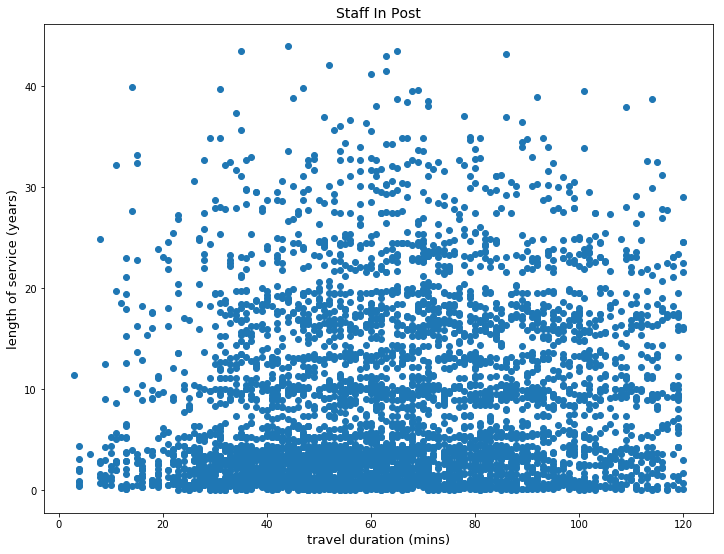

In [371]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
ax = plt.subplot(111)
ax.scatter(staffFinal['travelDuration'], staffFinal['LengthOfService(YearsFloat)'])
ax.set_xlabel('travel duration (mins)', fontsize=13)
ax.set_ylabel('length of service (years)', fontsize=13)
ax.set_title('Staff In Post', fontsize=14)
plt.show()

In [281]:
staffFinal.AgeBand.unique()

array(['26-30', '46-50', '21-25', '56-60', '31-35', '41-45', '51-55',
       '36-40', '61-65', '>=71 Years', '66-70', '<=20 Years'],
      dtype=object)

In [295]:
if staffFinal['AgeBand'][0] == '<=20 Years':
    print(True)
else:
    print(False)

False


In [298]:
staffFinal['AgeBandIndex'] = ''

In [317]:
def ageBandIndex(elem):
    if elem == "<=20 Years":
        return 1
    elif elem == "21-25":
        return 2
    elif elem == "26-30":
        return 3
    elif elem == "31-35":
        return 4
    elif elem == "36-40":
        return 5
    elif elem == "41-45":
        return 6
    elif elem == "46-50":
        return 7
    elif elem == "51-55":
        return 8
    elif elem == "56-60":
        return 9
    elif elem == "61-65":
        return 10
    elif elem == "66-70":
        return 11
    elif elem == ">=71 Years":
        return 12
    else:
        return np.nan

In [322]:
staffFinal['AgeBandIndex'] = staffFinal['AgeBand'].apply(ageBandIndex)

In [324]:
staffFinal.corr()

,IDnumber,FTE,ContractHours,LengthOfService(Years),LengthOfService(Months),TimeInGrade(Years),LengthOfService(YearsFloat),StartMonth,manual,travelDuration,AgeBandIndex
IDnumber,1.000000,0.066174,0.066195,-0.898238,-0.058216,-0.522576,-0.898786,-0.019277,0.215497,-0.208721,-0.617426
FTE,0.066174,1.000000,0.999966,-0.026870,-0.018915,0.001187,-0.027438,-0.060341,-0.103646,-0.025875,-0.091478
ContractHours,0.066195,0.999966,1.000000,-0.026972,-0.018941,0.001112,-0.027540,-0.060154,-0.103668,-0.025675,-0.091508
LengthOfService(Years),-0.898238,-0.026870,-0.026972,1.000000,0.029768,0.619521,0.999485,0.002659,-0.216529,0.182799,0.620796
LengthOfService(Months),-0.058216,-0.018915,-0.018941,0.029768,1.000000,0.049098,0.061820,0.095009,-0.029042,-0.017113,0.046637
TimeInGrade(Years),-0.522576,0.001187,0.001112,0.619521,0.049098,1.000000,0.620186,-0.005917,-0.156693,0.091561,0.434005
LengthOfService(YearsFloat),-0.898786,-0.027438,-0.027540,0.999485,0.061820,0.620186,1.000000,0.005704,-0.217143,0.181981,0.621380
StartMonth,-0.019277,-0.060341,-0.060154,0.002659,0.095009,-0.005917,0.005704,1.000000,0.071777,0.065424,0.043786
manual,0.215497,-0.103646,-0.103668,-0.216529,-0.029042,-0.156693,-0.217143,0.071777,1.000000,-0.031423,-0.117563
travelDuration,-0.208721,-0.025875,-0.025675,0.182799,-0.017113,0.091561,0.181981,0.065424,-0.031423,1.000000,0.148730


In [355]:
staffFinal.columns

Index(['IDnumber', 'Board', 'Division', 'Directorate', 'Locality', 'Service',
       'Department', 'Location', 'Gender', 'AgeBand', 'PostcodeSector',
       'PositionTitle', 'EmployeeCategory', 'AssignmentCategory', 'FTE',
       'ContractHours', 'Frequency', 'LengthOfService(Years)',
       'LengthOfService(Months)', 'nhsEntryDate', 'LatestStartDate',
       'StartDateInGrade', 'TimeInGrade(Years)',
       'AssignmentEffectiveStartDate', 'OriginalHireDate',
       'StartDateInPosition', 'LengthOfService(YearsFloat)', 'StartMonth',
       'WorkLocation', 'WorkAddress', 'WorkPostcode', 'WorkLocationFull',
       'manual', 'ResLatLon', 'WorkLatLon', 'travelDuration', 'ResLat',
       'ResLon', 'WorkLat', 'WorkLon', 'AgeBandIndex'],
      dtype='object')

In [374]:
staffInPost.PositionTitle.unique()

array(['Emergency Ambulance Crew', 'Emergency Medical Dispatcher Grade 2',
       'Community Resuscitation Training Officer',
       'Trainee Emergency Ambulance Crew 2', 'Paramedic B6',
       'Medicine Support Worker', 'Information Governance Manager',
       'Safeguarding Specialist Children & Adults', 'Paramedic NQ',
       'Clinical Advisor - Paramedic', 'Watch Manager (HQ)',
       'Emergency Medical Dispatcher Grade 1', 'Recruitment Team Leader',
       'Call Handler/Health Advisor 111', 'Web Developer',
       'Clinical Data Assistant', 'NETS Co-ordinator',
       'Station Administrator', 'Operations Manager', 'Ambulance Person',
       'Station Support Manager', 'Senior Business Intelligence Analyst',
       'Health Advisor', 'Shift Lead', 'Vehicle Resource Co-ordinator',
       'Finance Work Placement Trainee', 'Health Advisor - TUPE',
       'Corporate Secretary', 'Systems Manager',
       'Finance Trainee Accountant', 'Personal Assistant',
       'Business Manager', 'EBS Ad

In [380]:
len(staffInPost[staffInPost['PositionTitle'].str.lower().str.contains("emergency" or "paramedic" or "ambulance")])

1851

In [388]:
ambulanceStation = staffInPost[staffInPost['Department'].str.lower().str.contains("ambulance station")]

In [389]:
len(ambulanceStation)

2906

In [391]:
ambulanceStation['PositionTitle'].unique()

array(['Emergency Ambulance Crew', 'Trainee Emergency Ambulance Crew 2',
       'Paramedic B6', 'Paramedic NQ', 'Clinical Advisor - Paramedic',
       'Emergency Medical Technician 4', 'Apprentice Paramedic 4',
       'Senior Paramedic', 'Trainee Emergency Ambulance Crew 1',
       'Apprentice Paramedic 3', 'Emergency Medical Technician 3',
       'Clinical Advisor', 'OPC Paramedic B6',
       'Advanced Care Practitioner - Paramedic',
       'Cycle Response Unit Leader', 'Frequent Caller Manager'],
      dtype=object)

In [397]:
len(ambulanceStation[ambulanceStation['PositionTitle'].str.lower().str.contains("paramedic")])

1691

In [398]:
len(ambulanceStation[ambulanceStation['PositionTitle'].str.lower().str.contains("technician")])

304

In [400]:
len(ambulanceStation[ambulanceStation['PositionTitle'].str.lower().str.contains("ambulance crew")])

904

In [385]:
len(staffInPost)

5721

In [395]:
len(staffInPost[staffInPost['PositionTitle'].str.lower().str.contains("dispatcher")])

441

## Profile of the LAS Staff In Post
- Total of 5721 staff
- 2906 are based at an Ambulance Station (a bit more than half)

### Within the staff working at an ambulance station:
- 1691 are paramedics
- 904 are ambulance crew members
- 304 are technicians
- the rest are managers/leaders

In [408]:
leavers.Nationality.unique()

array(['British', 'Irish', nan, 'Indian', 'Cameroonian', 'Pakistani',
       'Zimbabwean', 'Canadian', 'Swedish', 'Dutch', 'Polish',
       'Australian', 'Nigerian', 'American', 'South African',
       'Portuguese', 'Romanian', 'Spanish', 'Chinese', 'Ghanaian',
       'Kenyan', 'Italian', 'New Zealander', 'Danish', 'Bangladeshi',
       'Finnish', 'Russian', 'Bulgarian', 'German', 'Greek', 'Hungarian',
       'French', 'Angolan', 'Jamaican'], dtype=object)

In [418]:
len(leavers)

2988

In [425]:
len(leavers[leavers['Nationality'].isnull()])

1117

In [420]:
leaversNoNA = leavers.dropna(axis=0, subset=["Nationality"])

In [421]:
len(leaversNoNA)

1871

In [427]:
len(leaversNoNA[leaversNoNA['Nationality'].str.lower().str.contains("british")])

1473

In [428]:
len(leaversNoNA) - len(leaversNoNA[leaversNoNA['Nationality'].str.lower().str.contains("british")])

398

In [429]:
398/1871

0.21272047033671834

In [430]:
def nonBritish(elem):
    if elem == 'British':
        return 0
    else:
        return 1

In [431]:
leaversNoNA['nonBritish'] = leaversNoNA['Nationality'].map(nonBritish)

C:\Users\rachelsim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [443]:
def relocation(elem):
    if "relocation" in elem:
        return 1
    else:
        return 0

In [444]:
leaversNoNA['relocation'] = leaversNoNA['Leaving Reason'].str.lower().map(relocation)

C:\Users\rachelsim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [448]:
leaversNoNA.corr()

,Employee Number,Leaving year,FTE,Length of Service (Years),Length of Service (Months),LOS,LOS (Years),nonBritish,relocation
Employee Number,1.000000,0.446681,0.130420,-0.705682,-0.060969,-0.709416,-0.709366,0.251487,0.016668
Leaving year,0.446681,1.000000,-0.000358,-0.032649,-0.036788,-0.036534,-0.036505,0.238193,0.108268
FTE,0.130420,-0.000358,1.000000,-0.113630,-0.019455,-0.115285,-0.115612,0.080820,0.097608
Length of Service (Years),-0.705682,-0.032649,-0.113630,1.000000,-0.016813,0.994012,0.994150,-0.171521,0.037669
Length of Service (Months),-0.060969,-0.036788,-0.019455,-0.016813,1.000000,0.092548,0.090822,-0.023356,0.005917
LOS,-0.709416,-0.036534,-0.115285,0.994012,0.092548,1.000000,0.999949,-0.173362,0.038159
LOS (Years),-0.709366,-0.036505,-0.115612,0.994150,0.090822,0.999949,1.000000,-0.173695,0.037797
nonBritish,0.251487,0.238193,0.080820,-0.171521,-0.023356,-0.173362,-0.173695,1.000000,0.370396
relocation,0.016668,0.108268,0.097608,0.037669,0.005917,0.038159,0.037797,0.370396,1.000000


In [455]:
len(leaversNoNA[(leaversNoNA.relocation==1)&(leaversNoNA.nonBritish==0)])

311

In [451]:
len(leaversNoNA[leaversNoNA.nonBritish==0])

1473

In [456]:
1871/2988

0.6261713520749665

In [457]:
from beautifultable import BeautifulTable

In [460]:
table = BeautifulTable()
table.column_headers = ["", "British", "Non-British", "Total"]
table.append_row(["Relocated", 311, 249, 560])
table.append_row(["Other", 1162, 149, 1311])
table.append_row(["Total", 1473, 398, 1871])
print(table)

+-----------+---------+-------------+-------+
|           | British | Non-British | Total |
+-----------+---------+-------------+-------+
| Relocated |   311   |     249     |  560  |
+-----------+---------+-------------+-------+
|   Other   |  1162   |     149     | 1311  |
+-----------+---------+-------------+-------+
|   Total   |  1473   |     398     | 1871  |
+-----------+---------+-------------+-------+


In [481]:
staffFinal.columns

Index(['IDnumber', 'Board', 'Division', 'Directorate', 'Locality', 'Service',
       'Department', 'Location', 'Gender', 'AgeBand', 'PostcodeSector',
       'PositionTitle', 'EmployeeCategory', 'AssignmentCategory', 'FTE',
       'ContractHours', 'Frequency', 'LengthOfService(Years)',
       'LengthOfService(Months)', 'nhsEntryDate', 'LatestStartDate',
       'StartDateInGrade', 'TimeInGrade(Years)',
       'AssignmentEffectiveStartDate', 'OriginalHireDate',
       'StartDateInPosition', 'LengthOfService(YearsFloat)', 'StartMonth',
       'WorkLocation', 'WorkAddress', 'WorkPostcode', 'WorkLocationFull',
       'manual', 'ResLatLon', 'WorkLatLon', 'travelDuration', 'ResLat',
       'ResLon', 'WorkLat', 'WorkLon', 'AgeBandIndex'],
      dtype='object')

In [492]:
tdmean = staffFinal.travelDuration.mean()

In [495]:
tdmean

63.113862390907244

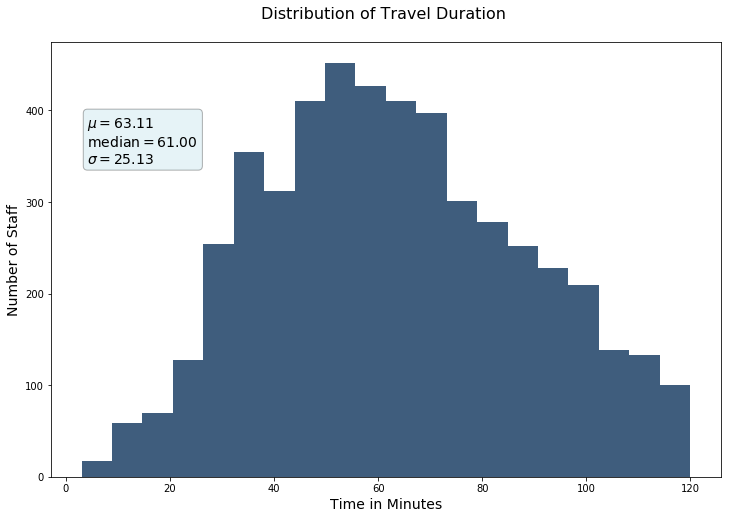

In [529]:
plt.figure(figsize=(12,8))
plt.hist(staffFinal.travelDuration, bins=20, color="#3F5D7D")
tdmean = staffFinal.travelDuration.mean()
tdmedian = np.median(staffFinal.travelDuration)
tdsigma = staffFinal.travelDuration.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (tdmean, ),
    r'$\mathrm{median}=%.2f$' % (tdmedian, ),
    r'$\sigma=%.2f$' % (tdsigma, )))
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.3)
plt.text(0.1, 1.7, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.title('Distribution of Travel Duration \n', fontsize=16)
plt.xlabel('Time in Minutes', fontsize=14)
plt.ylabel('Number of Staff', fontsize=14)
plt.show()